In [20]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [6]:
df = pd.read_csv("reviews (1).csv.gz",compression="gzip")

In [7]:
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,109,449036,2011-08-15,927861,Edwin,The host canceled my reservation the day befor...
1,109,74506539,2016-05-15,22509885,Jenn,Me and two friends stayed for four and a half ...
2,206662,780773,2011-12-12,1465676,Orlando,"Kevin is great Host, the apartment is clean an..."
3,206662,791960,2011-12-18,1465676,Orlando,"Excellent Host and excellent place, clean and ..."
4,206662,932852,2012-02-20,1559443,Nadine,I had a wonderful stay here and felt at home. ...


In [11]:
df["c_len"] =df["comments"].dropna().str.split("").map(len)

In [15]:
df["c_len"].describe()

count    1.356931e+06
mean     2.382752e+02
std      2.590350e+02
min      3.000000e+00
25%      8.100000e+01
50%      1.670000e+02
75%      3.070000e+02
max      6.114000e+03
Name: c_len, dtype: float64

<AxesSubplot: >

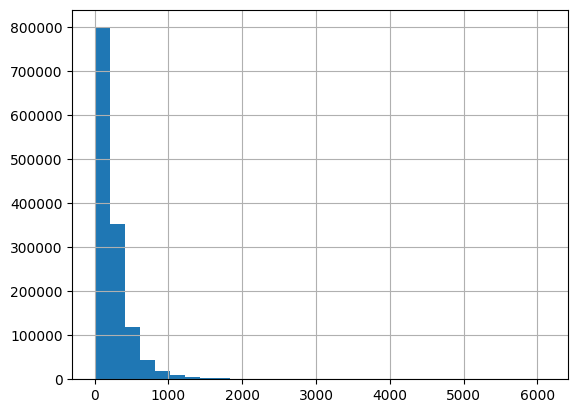

In [19]:
df["c_len"].hist(bins=30)

In [26]:
df =df.dropna(subset="comments")

In [ ]:



# Vectorize the text data using a CountVectorizer
# vectorizer = CountVectorizer(max_features=1000, stop_words='english')

vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

X = vectorizer.fit_transform(df["comments"].dropna())

# Train the LDA model with 10 topics
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Print the top 10 words associated with each topic
feature_names = vectorizer.get_feature_names()



In [ ]:
# evaluate the LDA model
perplexity = lda.perplexity(df["comments"])


In [ ]:
# we can detect the most frequent aspect concerned by customer.
for topic_idx, topic in enumerate(lda.components_):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i]
                    for i in topic.argsort()[:-10 - 1:-1]]))
    print()


In [ ]:
# next, I will compare several hyperparameters to get a good n_components